In [1]:
# Make imports
import numpy as np
from matplotlib import pyplot as plt
# inline plotting
%matplotlib inline
np.set_printoptions(threshold=5)

In [2]:
# import training set of the form:
# input_value,output_value
lines = open('ex1data1.txt').readlines()

# number of training examples
m = len(lines)
# initialize X, the set of inputs(m values, each having one feature)
X = np.zeros((m,1))
# initialize y, the set of outputs(also has m values, one for each training example)
y = np.zeros((m,1))

# separate the input and output 
for i,l in enumerate(lines):
    X[i], y[i] = map(float, l.strip().split(','))
print 'X =\n',X
print 'y =\n',y


X =
[[  6.1101]
 [  5.5277]
 [  8.5186]
 ..., 
 [  8.2934]
 [ 13.394 ]
 [  5.4369]]
y =
[[ 17.592  ]
 [  9.1302 ]
 [ 13.662  ]
 ..., 
 [  0.14454]
 [  9.0551 ]
 [  0.61705]]


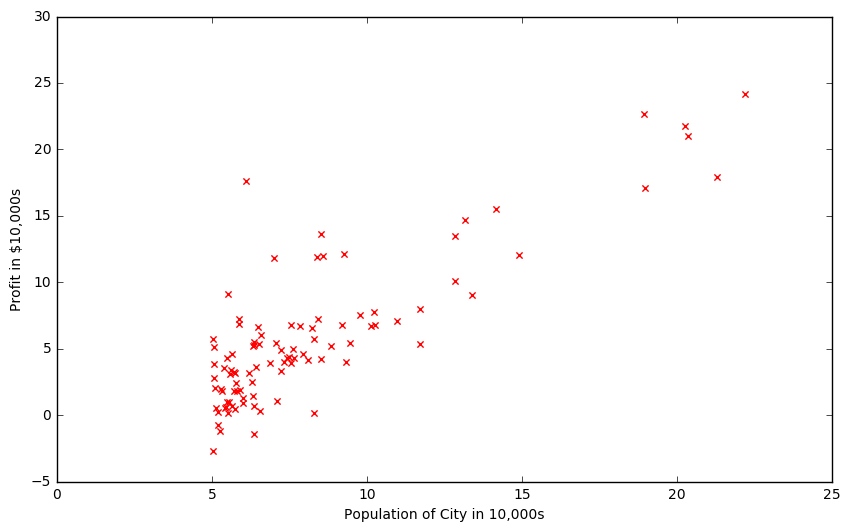

In [3]:
# plots the imported dataset
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X, y, c="red", marker="x")
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

In [4]:
# Cost function
def computeCost(X, y, t, m):
    return np.sum((np.dot(X, t) - y) ** 2)/(2*m)

In [5]:
# Augment X with a column of zeros to the righmost column
augX = np.insert(X, 0, np.ones(97), axis=1)

# Create a coefficient(theta) vector which has one coeff. for each feature of the input
# An extra coeff for the augmented column so that vector ops are possible
theta = np.zeros((2,1))

# use the cost function to compute cost
cost = computeCost(augX, y, theta, m)
print 'cost =',cost

cost = 32.0727338775


In [6]:
# Gradient descent

iterations = 1500

# Learning rate
alpha = 0.01

print "Initial cost =", cost

# Run the gradient descent algotrithm for 1500 iterations
for i in range(iterations):
    hyp = np.dot(augX, theta)
    deviation = hyp - y
    
    # find the gradient
    grad = np.dot(augX.T, deviation)/m
    
    # find new theta according to the gradient and learning rate
    theta = theta - (alpha*grad)
print "Final cost =", computeCost(augX, y, theta, m)

Initial cost = 32.0727338775
Final cost = 4.48338825659


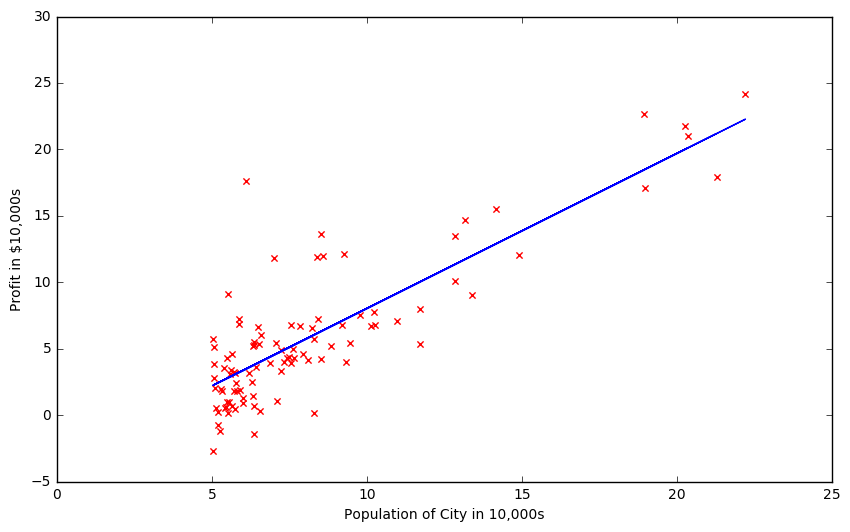

In [7]:
# Fit the data with the computed coefficients
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X, y, c="red", marker="x")
plt.plot(X, np.dot(augX, theta), c="blue", linestyle='-')
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

theta0 = [-10.         -9.7979798  -9.5959596 ...,   9.5959596   9.7979798  10.       ]
theta1 = [ 1.          1.03030303  1.06060606 ...,  3.93939394  3.96969697  4.        ]


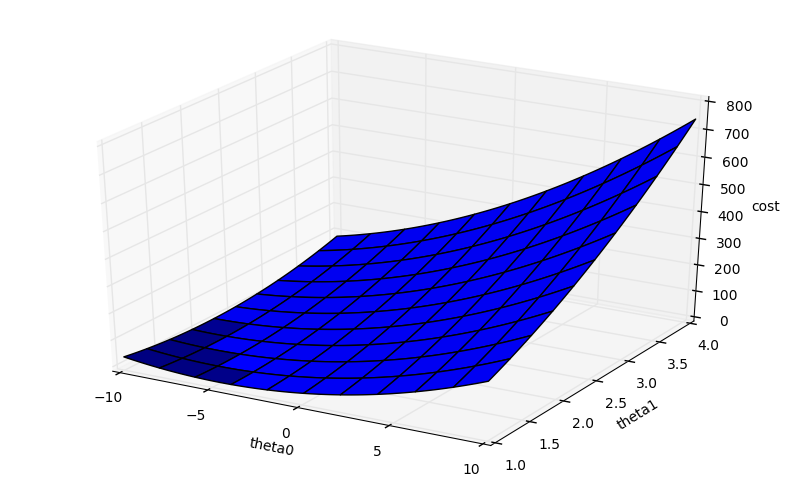

In [8]:
# Plot the 3d cost function for a test set of data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# theta0 is obtained by dividing up -10 to 10 into 100 parts
theta0 = np.linspace(-10,10,num=100)

# theta1 is obtained by dividing up 1 to 4 into 100 parts
theta1 = np.linspace(1, 4, num=100)

# Cost function values
J_vals = np.zeros((len(theta0), len(theta1)));
print 'theta0 =',theta0
print 'theta1 =',theta1

# Compute cost at each point
for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([[theta0[i]], [theta1[j]]]);    
        J_vals[i][j] = computeCost(augX, y, t, len(X))
        
# Setup theta0 and theta1 for surface plot        
theta0_mesh, theta1_mesh = np.meshgrid(theta0, theta1)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_mesh, theta1_mesh, J_vals)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost')